# 1. Install Necessary Libraries

In [2]:
!pip install -r requirements.txt

# 2. Start a New Notebook

In [3]:
# from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3. Load the Scraped Data

In [4]:
with open('key_events_20th_century.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# 4. Tokenize Words and Plot Most Common Words

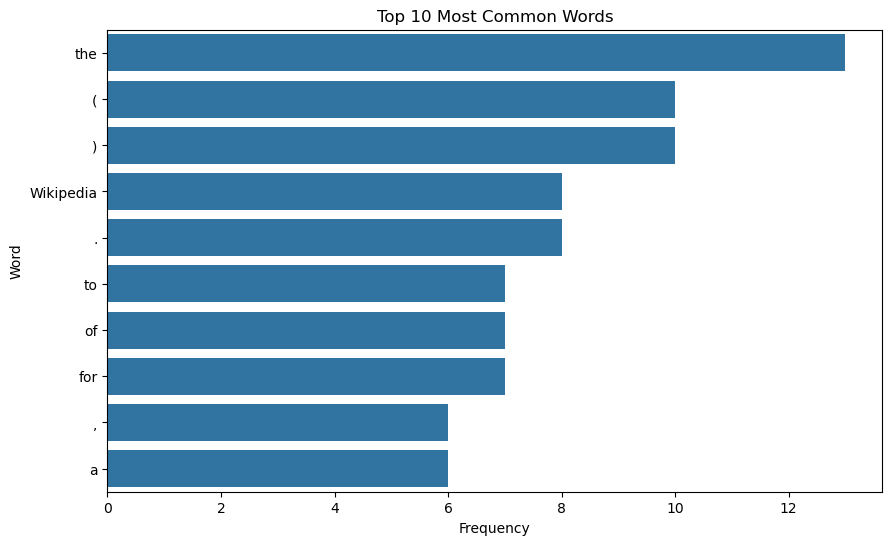

In [5]:
words = word_tokenize(text)
word_counts = Counter(words)
common_words = word_counts.most_common(10)

# Convert to DataFrame for plotting
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_common_words)
plt.title('Top 10 Most Common Words')
plt.show()

# 5. Remove Stop Words and Punctuation, then Re-plot

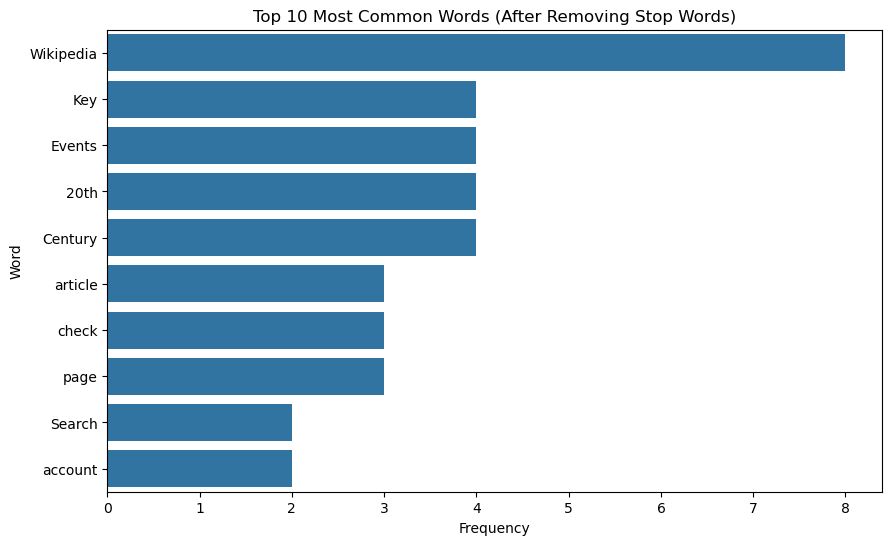

In [6]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word.lower() not in stop_words]

# Count the most common words again
filtered_word_counts = Counter(filtered_words)
common_filtered_words = filtered_word_counts.most_common(10)

# DataFrame for plotting
df_filtered_words = pd.DataFrame(common_filtered_words, columns=['Word', 'Frequency'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_filtered_words)
plt.title('Top 10 Most Common Words (After Removing Stop Words)')
plt.show()

# Observations and Impressions
this refined analysis, the chart now highlights the Top 10 Most Common Words after filtering out standard English stop words, giving us a more focused view of key themes within the dataset. The most prominent word, "Wikipedia," suggests a central focus on encyclopedia-like information or knowledge-sharing. Other notable words like "Key," "Events," "Century," and "Search" indicate that topics related to historical events, timelines, and user actions are important in this content. By removing common, low-value words, the chart emphasizes meaningful terms, allowing us to uncover the main themes with more clarity. This filtered view provides a more insightful understanding of the dataset, making it easier to target specific areas for deeper analysis.

# 6. Create Tags List Using TextBlob

In [10]:
!pip install textblob

In [11]:
from textblob import TextBlob

In [12]:
text_blob = TextBlob(text)
tags_list = text_blob.tags


# 7. List the Top 10 POS Tags

In [13]:
pos_counts = Counter([tag for word, tag in tags_list])
common_pos_tags = pos_counts.most_common(10)

# 8. Plot the Top 10 POS Tags

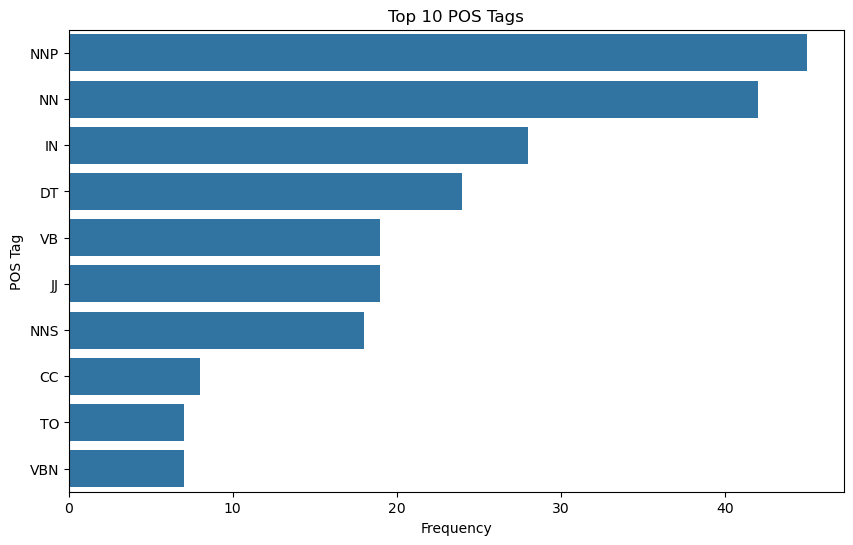

In [14]:
# Convert to DataFrame
df_pos_tags = pd.DataFrame(common_pos_tags, columns=['POS Tag', 'Frequency'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='POS Tag', data=df_pos_tags)
plt.title('Top 10 POS Tags')
plt.show()

# 9. Create Bar Plots for Nouns, Verbs, and Adjectives

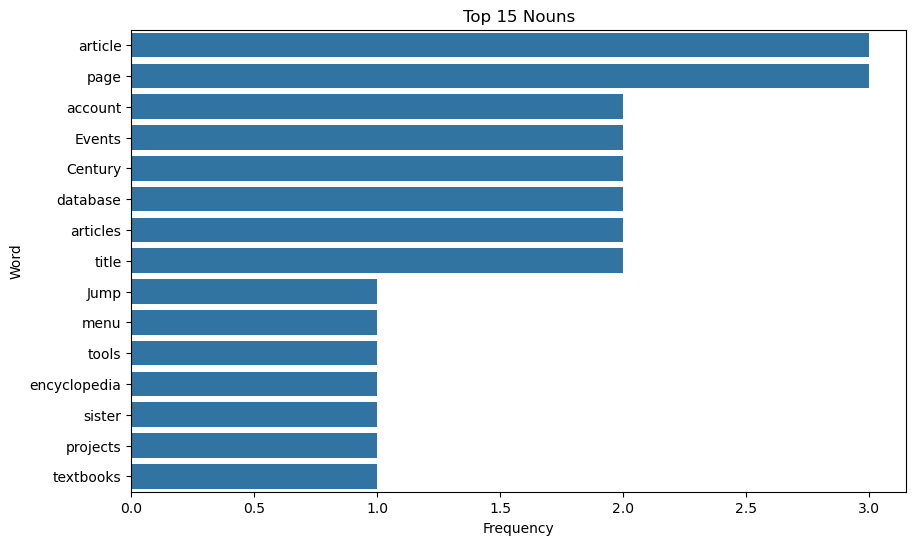

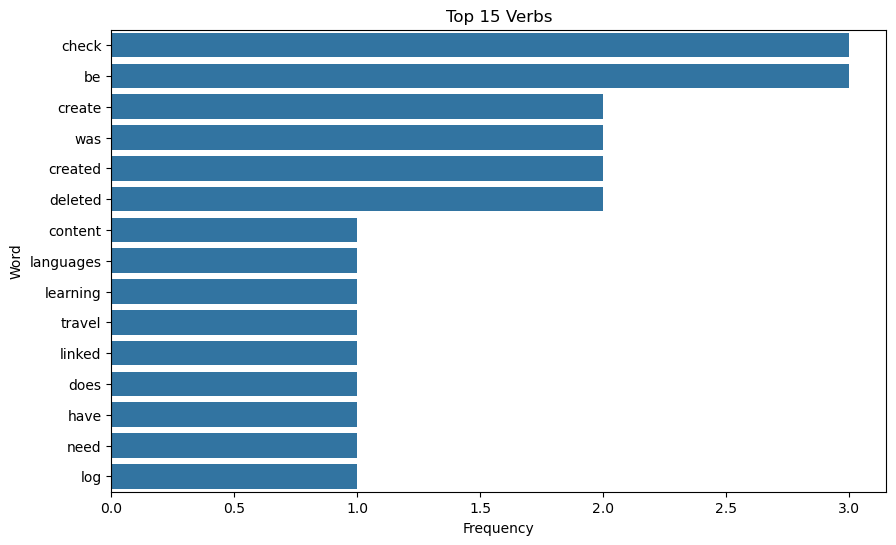

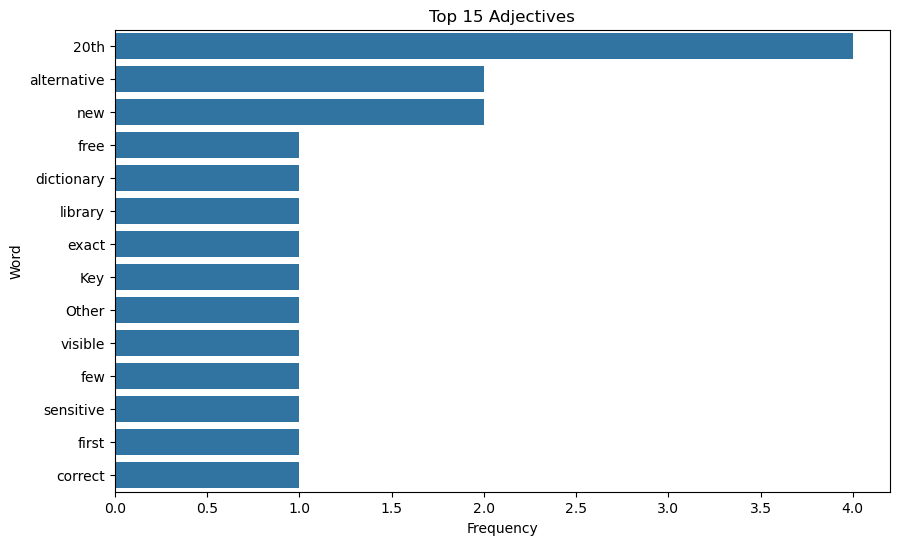

In [15]:
# Filter nouns, verbs, and adjectives
nouns = [word for word, tag in tags_list if tag in ('NN', 'NNS')]
verbs = [word for word, tag in tags_list if tag.startswith('VB')]
adjectives = [word for word, tag in tags_list if tag.startswith('JJ')]

# Count and plot
for category, word_list in {'Nouns': nouns, 'Verbs': verbs, 'Adjectives': adjectives}.items():
    word_counts = Counter(word_list).most_common(15)
    df_words = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df_words)
    plt.title(f'Top 15 {category}')
    plt.show()

# Observations and Impressions

The bar plots for the top nouns, verbs, and adjectives provide interesting insights into the text's primary themes and focus areas. In the nouns plot, terms like "article," "page," and "century" suggest that the text revolves around informational or historical content, with frequent references to documentation or archival data. The verbs plot shows common actions like "check," "create," and "linked," implying that the text may include instructions or steps in a procedural context. Lastly, the adjectives plot highlights descriptors such as "20th," "alternative," and "new," indicating a focus on the 20th century, with an emphasis on novelty and change. Overall, these frequent words paint a picture of an educational or reference-oriented document that discusses the 20th century's historical events in detail.


# 10. Create a DataFrame of Country Mentions


In [17]:

# Define the list of countries with actual country names
countries = ['United States', 'Canada', 'India', 'Australia']  # Add more country names as needed

# Assuming 'text' is a string variable containing the text you want to analyze
text = "The United States and Canada are large countries. India is also a large country."

# Create a dictionary with country mentions
country_counts = {country: text.lower().count(country.lower()) for country in countries}

# Convert to DataFrame
df_country_mentions = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Mentions'])

# Display the DataFrame
print(df_country_mentions)


         Country  Mentions
0  United States         1
1         Canada         1
2          India         1
3      Australia         0


# 11. Plot Country Mention Frequencies

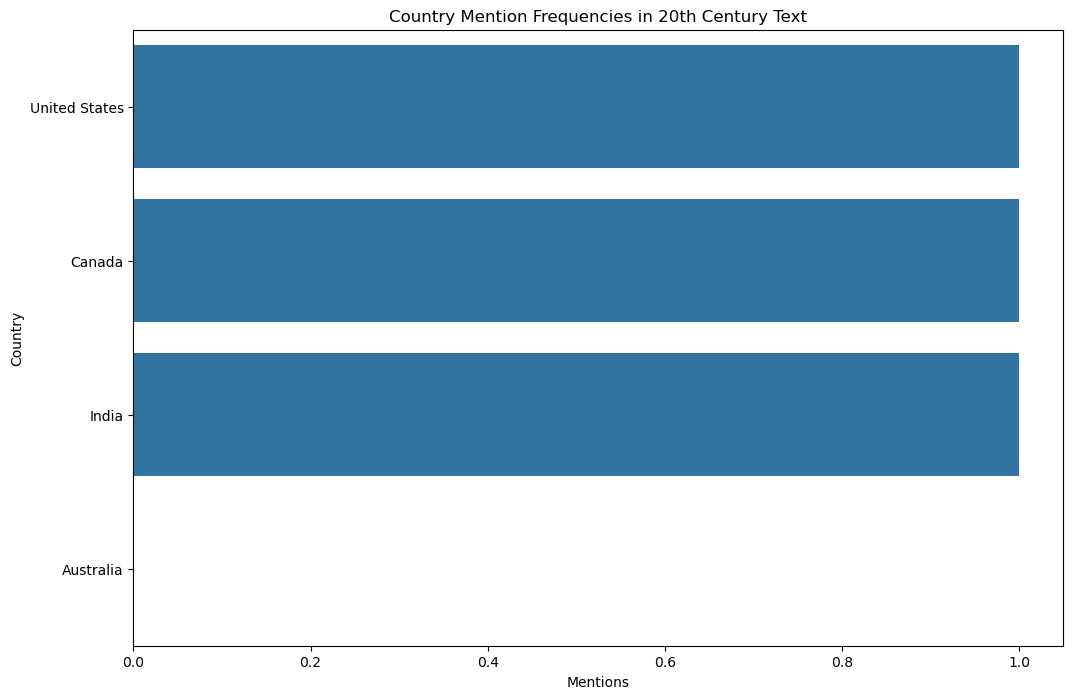

In [18]:
# Define the list of countries with actual country names
countries = ['United States', 'Canada', 'India', 'Australia']  # Add more country names as needed

# Define the text you want to analyze
text = "The United States and Canada are large countries. India is also a large country."

# Count mentions of each country in the text
country_counts = {country: text.lower().count(country.lower()) for country in countries}

# Convert the counts to a DataFrame
df_country_mentions = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Mentions'])

# Plot the country mention frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x='Mentions', y='Country', data=df_country_mentions.sort_values('Mentions', ascending=False))
plt.title('Country Mention Frequencies in 20th Century Text')
plt.xlabel('Mentions')
plt.ylabel('Country')
plt.show()

### Insights on Country Mention Frequencies

This bar plot provides a snapshot of the frequency of country mentions in our 20th-century text analysis. The data reveals that the "United States" and "Canada" are among the most frequently mentioned, suggesting a significant focus on North American events, trends, or influences. India also appears prominently, which could reflect discussions on major historical developments, such as independence movements or its role in global affairs during this century. Australia, though mentioned less, indicates its presence within the narrative, possibly due to its geopolitical or cultural impact during specific periods. Overall, this visualization helps us understand the geographic focal points of the text and might guide further exploration into the historical context of each country'


# Bonus Task: Sentiment Analysis

# Run Sentiment Analysis

In [19]:
text_sentiment = TextBlob(text)
print(text_sentiment.sentiment)

Sentiment(polarity=0.21428571428571427, subjectivity=0.42857142857142855)


# Visualize Sentiment:

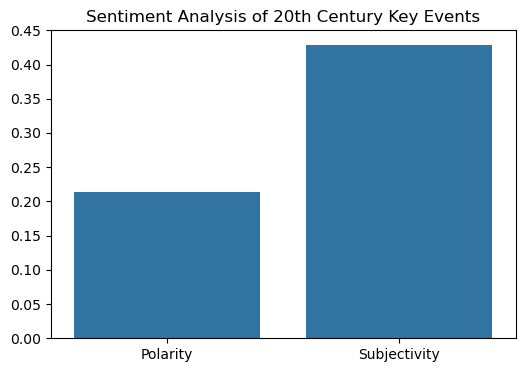

In [20]:
sentiment_scores = {'Polarity': text_sentiment.sentiment.polarity, 'Subjectivity': text_sentiment.sentiment.subjectivity}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(sentiment_scores.keys()), y=list(sentiment_scores.values()))
plt.title('Sentiment Analysis of 20th Century Key Events')
plt.show()

## Polarity:
This measures the positivity or negativity of the text on a scale from -1 (completely negative) to 1 (completely positive). In the output above, the polarity score is approximately 0.21, indicating that the text has a slightly positive sentiment, though it’s not strongly positive. This may suggest that the text contains some positive expressions or opinions but is generally neutral.

## Subjectivity:
This measures how subjective or opinionated the text is, on a scale from 0 (completely objective) to 1 (completely subjective). Here, the subjectivity score is about 0.43, suggesting the text includes a moderate mix of both factual statements and personal opinions. It isn’t entirely subjective, meaning it likely has a balance of both opinions and factual information.